# Keras Tensor Flow - Ajuste Hiperparâmetros Trilha 8: Tarefa (Peso 3)
###### Gabriel Elias Lima Silva

## Fraudes de Cartão de Crédito
- Endereço do executavel: https://github.com/VanJessen/Deep-Learning-Mackenzie
- Endereço do arquivo para download: https://www.kaggle.com/elvisacaciobarbosa/detec-o-de-fraude-no-cart-o-de-cr-dito/data

Esse trabalho tem como objetivo ajudar a entender as características de uma transação fraudulenta de cartão de crédito. Bem como prever através das características dessa transação, se essa é ou não uma fraude. O tema é 100% relevante pois trabalho no Santander e essa é uma oportunidade que eu tenho de entender academicamente como eu posso agregar valor na atividade que possuo hoje no Banco.

#### Importações e Configurações Iniciais

In [1]:
import warnings
warnings.filterwarnings("ignore")


In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Dropout
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import pandas_profiling as pp

#### Importando a base

In [3]:
df = pd.read_csv('creditcard.csv')

#### Realizando Análise Exploratório - EDA | Aplicando tratamentos ao dataset

In [4]:
#pp.ProfileReport(df)

In [5]:
df.shape

(284807, 31)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
# conhecendo a base
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [8]:
#verificando estatistica da base
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,3.919560e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,5.688174e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-8.769071e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.782312e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,-1.552563e-15,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,2.010663e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-1.694249e-15,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,-1.927028e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-3.137024e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [9]:
# verificando se existe valores nulos na base

df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [10]:
# verificando se existe duplicidades na base
df.duplicated().sum()

1081

In [11]:
# foi identificado duplicidades e ser tratadas
df.drop_duplicates(inplace=True)

In [12]:
# confirmando se ainda existe duplicidades na base
df.duplicated().sum()

0

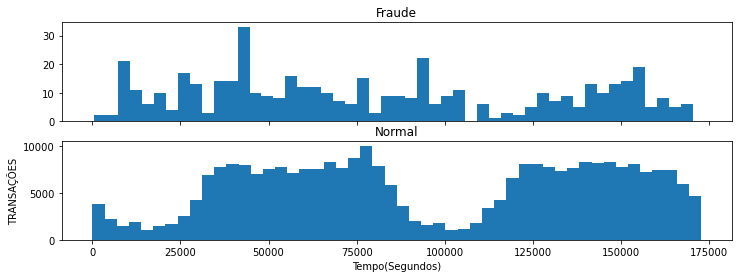

In [13]:
# Avaliando Distribução das classes
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

bins = 50

ax1.hist(df.Time[df.Class == 1], bins = bins)
ax1.set_title('Fraude')

ax2.hist(df.Time[df.Class == 0], bins = bins)
ax2.set_title('Normal')

plt.xlabel('Tempo(Segundos)')
plt.ylabel('TRANSAÇÕES')
plt.show()

#### Preparando os dados

In [14]:
# dividindo o target das demais features
X = df.iloc[:,0:-1]
y = df.iloc[:,-1]

In [15]:
X.shape

(283726, 30)

In [16]:
y.shape

(283726,)

##### Após execução da tarefa da trilha 6 observei que cometi um erro nessa tarefa ao não realizar o balanceamento. Precisei retornar e fazer essa correção.

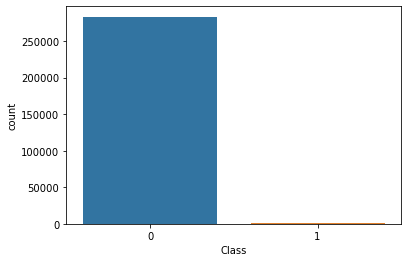

In [17]:
sns.countplot(y)
plt.show()

Observa-se que o target está altamente desbalanceado. Há a necessidade de balanceamento para que o modelo não entenda que tudo não é Fraude e obter alta acurácia dessa maneira;

In [18]:
#balanceando dataset através do metodo RandomOverSampler. 
#O metodo em questão adicona registros semelhantes a classe com menor categoria no dataset
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler()
X,y = oversample.fit_resample(X, y)

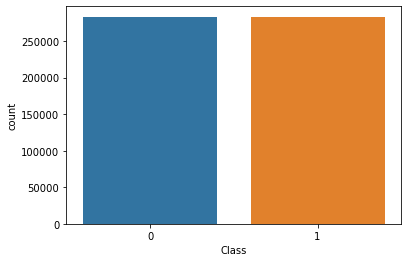

In [19]:
sns.countplot(y)
plt.show()

In [20]:
from sklearn.preprocessing import scale
X = scale(X)

In [21]:
X.shape

(566506, 30)

In [22]:
#dividindo a base em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1)

In [23]:
# Iniciando 

In [24]:
import kerastuner as kt

In [25]:
def model_builder(hp):

  # Hiperparâmetros do modelo
  #----------------------------------------------------------------------------- 
  hp_units_1 = hp.Int('hp_units_1', min_value=4, max_value=10, step=2)
  hp_drop_out = hp.Choice('Dropout', values=[0.05, 0.10, 0.15, 0.20])
  hp_activaton_out = hp.Choice('activation', values=['sigmoid','tanh'])

  # Hiperparâmetros do algoritmo
  #----------------------------------------------------------------------------- 
  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

  model = keras.Sequential(layers.Dense(units=hp_units_1, activation='relu', input_shape=[X.shape[1]]))
  model.add(Dropout(hp_drop_out))
  model.add(layers.Dense(1, activation=hp_activaton_out))
  
# Compila o Modelo
#-------------------------------------------------------------------------------

  model.compile(keras.optimizers.Adam(learning_rate=hp_learning_rate), 
                loss='binary_crossentropy', 
                metrics=['binary_accuracy'])

  return model

In [26]:
# Instancia o Tuner
#-------------------------------------------------------------------------------

tuner = kt.Hyperband(model_builder,
                     objective='val_binary_accuracy',
                     max_epochs=1,
                     factor=3,
                     directory='mydir',
                     project_name='FraudesCartaoDeCredito')

stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_binary_accuracy', patience=5)

INFO:tensorflow:Reloading Oracle from existing project mydir\FraudesCartaoDeCredito\oracle.json
INFO:tensorflow:Reloading Tuner from mydir\FraudesCartaoDeCredito\tuner0.json


In [27]:
tuner.search(X_train, y_train, 
             batch_size=8,
             epochs=3, 
             validation_split=0.2, 
             callbacks=[stop_early])

# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

INFO:tensorflow:Oracle triggered exit


In [28]:
print(f"""
The hyperparameter search is complete.

O melhor hp_units_1 é {best_hps.get('hp_units_1')} 
O melhor dropout é {best_hps.get('Dropout')} 
A melhor ativação é {best_hps.get('activation')}
A melhor taxa de aprendizado é: {best_hps.get('learning_rate')}
""")


The hyperparameter search is complete.

O melhor hp_units_1 é 4 
O melhor dropout é 0.15 
A melhor ativação é sigmoid
A melhor taxa de aprendizado é: 0.001



In [29]:
model = tuner.hypermodel.build(best_hps)

history = model.fit(X_train, y_train, 
                    batch_size=8,
                    epochs=3, 
                    validation_split=0.2,
                    verbose=0)

val_acc_per_epoch = history.history['val_binary_accuracy']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))

Best epoch: 3


In [30]:
hypermodel = tuner.hypermodel.build(best_hps)

# Retrain the model
hypermodel.fit(X_train, y_train, 
               batch_size=8,
               epochs=best_epoch,
               validation_split=0.2)

Epoch 1/3
39656/39656 [==============================] - 91s 2ms/step - loss: 0.1610 - binary_accuracy: 0.9417 - val_loss: 0.1167 - val_binary_accuracy: 0.9623
Epoch 2/3
39656/39656 [==============================] - 90s 2ms/step - loss: 0.1330 - binary_accuracy: 0.9545 - val_loss: 0.1099 - val_binary_accuracy: 0.9576
Epoch 3/3
39656/39656 [==============================] - 88s 2ms/step - loss: 0.1298 - binary_accuracy: 0.9557 - val_loss: 0.1067 - val_binary_accuracy: 0.9608


In [39]:
eval_result = hypermodel.evaluate(X_test, y_test)
print("[test loss, test accuracy]:", eval_result)

5311/5311 [==============================] - 32s 6ms/step - loss: 0.1082 - binary_accuracy: 0.9605
[test loss, test accuracy]: [0.10817407816648483, 0.9604770541191101]


In [40]:
#Instanciando o Modelo
model = keras.Sequential([
    layers.Dense(29, activation='sigmoid', input_shape=[30]),
    layers.Dense(1, activation='sigmoid',)
])


In [41]:
# Sumarização do Modelo
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 29)                899       
                                                                 
 dense_9 (Dense)             (None, 1)                 30        
                                                                 
Total params: 929
Trainable params: 929
Non-trainable params: 0
_________________________________________________________________


In [42]:
#Instanciando o Modelo
model.compile(loss='binary_crossentropy',optimizer="adam",metrics=['binary_accuracy'],)

In [43]:
# Otimizando o modelo com Cross Entropy  
model.compile(loss='binary_crossentropy',
             metrics=['binary_accuracy'],run_eagerly=True)

In [44]:
# Treinamento do modelo
history = model.fit(X_train, y_train,
                    batch_size=8,
                    validation_split=0.3,
                    epochs=2,
                    verbose=1,
                   )

Epoch 1/2
34699/34699 [==============================] - 1486s 43ms/step - loss: 0.1314 - binary_accuracy: 0.9499 - val_loss: 0.1062 - val_binary_accuracy: 0.9599
Epoch 2/2
34699/34699 [==============================] - 1682s 48ms/step - loss: 0.0812 - binary_accuracy: 0.9684 - val_loss: 0.0605 - val_binary_accuracy: 0.9768


In [45]:
# realizando as predições
y_pred = model.predict(X_test) 

#### Acuracidade e Performance do Modelo

,loss,binary_accuracy,val_loss,val_binary_accuracy
0,0.131430,0.949915,0.106171,0.959888
1,0.081197,0.968432,0.060491,0.976834


Best Validation Loss: 0.0605
Best Validation Accuracy: 0.9768


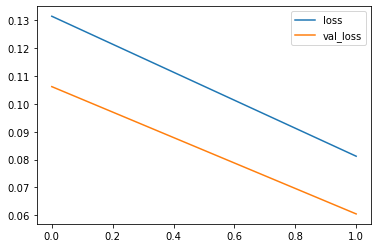

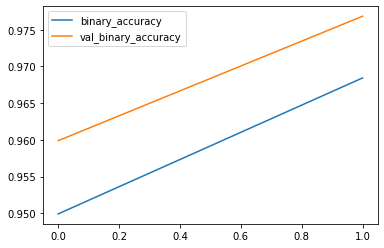

In [46]:
#  função para sumarizar resultados do modelo.
def display_hist(history):
    history_df = pd.DataFrame(history.history)
    display(history_df.head())
    # Start the plot at epoch 0
    history_df.loc[0:, ['loss', 'val_loss']].plot()
    history_df.loc[0:, ['binary_accuracy', 'val_binary_accuracy']].plot()
    print(("Best Validation Loss: {:0.4f}" +\
    "\nBest Validation Accuracy: {:0.4f}")\
    .format(history_df['val_loss'].min(),
    history_df['val_binary_accuracy'].max()))
    return
display_hist(history)

Foi necessário revisitar os parâmetros do modelo, uma vez que o algotimo demorou mais de 8h e não concluiu a execução. Por esse motivo, devido a falta de tempo, precisei limitar o epochs e o valor máximo de unidades das camadas ocultas para 10 nos hiperparâmetros buscando assim obter melhor performance em tempo de execução. Provavel que por conta disso o algoritmo de Tensor Flow desenvolvido na trilha 4 obteve melhor acurácia do que o modelo atual com 99.94% de acurácia e 0.0064% de loss.Apesar disso o resultado do modelo atual foi excelente com 97.68%  de acurácia e e 0.081% de loss.Nas execuções anteriores o modelo obteve algo próximo de 98.60% de acurácia